In [2]:
import numpy as np
import matplotlib.pyplot as plt

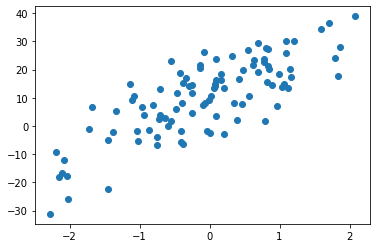

In [93]:
# dados simulados
# x é uma conjunto aleatório de 100 pontos com distribuição normal de meida 0 e desvio padrao 1
x = np.random.normal(0,1,100)
# y = 10 + 10*x + erro (ruido de média 0 com um desvio padrão de 10) 
y = 10 + 10*x + np.random.normal(0,10,len(x))
# exibe um diagrama de dispersão de x e y
plt.scatter(x,y);

A relação entre x e y pode ser escrita por uma equação ideal: <br>
y = $\beta$$_0$ + ( x * $\beta$$_1$ ) <br>

Na prática podemos montar um sistema de equações com os dados empiricos (nossos dados simulados):<br><br>
$\;$ 4,198 = 1 * $\beta$$_0$ + (-0,332 * $\beta$$_1$ ) <br>
23,890 = 1 * $\beta$$_0$ + ( 1,003 * $\beta$$_1$ ) <br>
$\;$ 0,061 = 1 * $\beta$$_0$ + (-0,699 * $\beta$$_1$ ) <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;$... <br>
22,419 = 1 * $\beta$$_0$ + (1,409 * $\beta$$_1$ ) <br><br>
Nenhum valor de $\beta$$_0$ e $\beta$$_1$ resolve todas as equações <br>
Mas qual valor fixo de $\beta$$_0$ e $\beta$$_1$ diminui o erro total do sistema de equações?

Podemos empacotar o sistema de equações em matrizes: <br><br>
y = A * $\beta$  <br><br>
onde y é um vetor com os valores de y:<br>

In [94]:
y[:5] # vamos ver os primeiros 5 valores de y para entender melhor

array([-5.48997419,  9.15546829,  6.89489865, 29.57143517,  8.1642013 ])

a matrix A são os valores que multiplicam $\beta$$_0$ e $\beta$$_1$ em cada equação do sistema, <br>


In [95]:
A = np.vstack( [np.ones(len(x)), x] ).T
A[:5] # vamos olhar os 5 primeiros valores para entender o que é a matrix A

array([[ 1.        , -1.02358774],
       [ 1.        , -1.11109591],
       [ 1.        ,  0.97078761],
       [ 1.        ,  0.69873017],
       [ 1.        ,  0.35052676]])

e o vetor $\beta$$_0$ armazena os coeficientes que desejamos calcular [$\beta$$_0$ , $\beta$$_1$].

Podemos reorganizar a equação da seguinte forma: <br><br>
y = A * $\beta$ <br>
A$^T$. y = (A$^T$. A) . $\beta$ <br>
(A$^T$. y).(A$^T$. A)$^I$ =  $\beta$ <br><br>
onde $^T$ indica a transposta e $^I$ indica a inversa da matrix indicada.


In [96]:
# em codigo, temos o seguinte (dividido em etapas para ser mais simples de visualizar):
operacao1 = np.dot(A.T , y) # produto vetorial de A transposta e y
operacao2 = np.dot(A.T , A) # produto vetorial de A e a sua transposta
beta =  np.dot( operacao1, np.linalg.inv(operacao2)) # produto vetorial da operacao1 e da inversa da operacao2
beta

array([11.04675176, 10.69804184])

O resultado encontrado indica os valores de $\beta$$_0$ e $\beta$$_1$ que minimizam o erro da nossa equação ideal <br>
Com esses valores é possivel, por exemplo, estimar os valores de y bom base nos valores de x

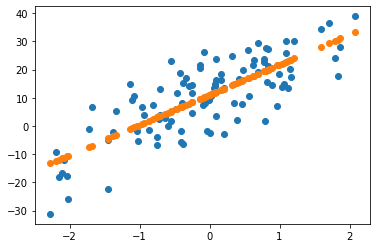

In [102]:
# estima os valores de y usando a equação
estimativa_y = 1 * beta[0] + x *beta[1]
# visualiza a estimativa junto aos valores medidos
plt.scatter(x,y)
plt.scatter(x,estimativa_y)

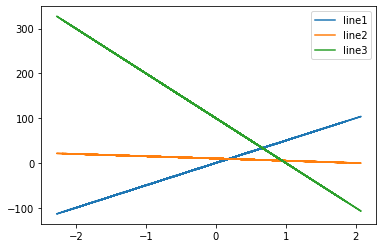

In [160]:
a1,b1=50,0
a2,b2=-5,10
a3,b3=-100,100

y1=a1*x + b1
y2=a2*x + b2
y3=a3*x + b3

plt.plot(x,y1,label='line1')
plt.plot(x,y2,label='line2')
plt.plot(x,y3,label='line3')
plt.legend();